# Analyse du jeu de données `vehicules-2021.csv`

Ce notebook examine le jeu de données `vehicules-2021.csv`. Nous allons explorer la structure des données, identifier les problèmes tels que les valeurs manquantes et les valeurs aberrantes, et générer des statistiques descriptives et des visualisations pour mieux comprendre le jeu de données.

## Table des matières
1. [Importation des bibliothèques](#importation-des-bibliothèques)
2. [Chargement des données](#chargement-des-données)
3. [Examen des données](#examen-des-données)
4. [Identification des valeurs manquantes](#identification-des-valeurs-manquantes)
5. [Statis descriptives](#Statis-descriptives)
6. [Identification des valeurs aberrantes](#identification-des-valeurs-aberrantes)
7. [Visualisation des données](#visualisation-des-données)
8. [Conclusion](#conclusion)

## 1. Importation des bibliothèques



In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

#options de visualisation
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## 2. Chargement des données

In [2]:
directory_path = os.path.dirname(os.path.abspath('')) 

file_path = os.path.join(directory_path, 'data', 'vehicules-2021.csv')
vehicules_df = pd.read_csv(file_path)

vehicules_df.head()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202100000001,201 764,B01,1,1,0,2,1,1,5,NaN
1,202100000001,201 765,A01,1,7,0,9,3,17,1,NaN
2,202100000002,201 762,A01,0,7,2,2,1,1,0,NaN
3,202100000002,201 763,B01,0,7,0,2,1,9,0,NaN
4,202100000003,201 761,A01,1,7,0,1,3,1,1,NaN


## 3. Examen des données


In [3]:
vehicules_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97315 entries, 0 to 97314
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Num_Acc      97315 non-null  int64  
 1   id_vehicule  97315 non-null  object 
 2   num_veh      97315 non-null  object 
 3   senc         97315 non-null  int64  
 4   catv         97315 non-null  int64  
 5   obs          97315 non-null  int64  
 6   obsm         97315 non-null  int64  
 7   choc         97315 non-null  int64  
 8   manv         97315 non-null  int64  
 9   motor        97315 non-null  int64  
 10  occutc       744 non-null    float64
dtypes: float64(1), int64(8), object(2)
memory usage: 8.2+ MB


## 4. Identification des valeurs manquantes

In [4]:
# Identifier les valeurs manquantes
missing_values = vehicules_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

occutc    96571
dtype: int64

In [5]:
# Calculer le pourcentage de valeurs manquantes
missing_percentage = (missing_values / len(vehicules_df)) * 100
missing_data = pd.DataFrame({'Valeurs manquantes': missing_values, 'Pourcentage': missing_percentage})
missing_data

,Valeurs manquantes,Pourcentage
occutc,96571,99.235472


occutc (Nombre d’occupants dans le transport en commun) 

## 5. Statistiques descriptives

In [6]:
descriptive_stats = vehicules_df.describe().transpose()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Num_Acc,97315.0,2.021000e+11,16273.749446,2.021000e+11,2.021000e+11,2.021000e+11,2.021000e+11,2.021001e+11
senc,97315.0,1.550542e+00,0.822866,-1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
catv,97315.0,1.313488e+01,13.858457,-1.000000e+00,7.000000e+00,7.000000e+00,1.000000e+01,9.900000e+01
obs,97315.0,9.817705e-01,3.066642,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01
obsm,97315.0,1.685249e+00,1.275214,-1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
choc,97315.0,2.887838e+00,2.415910,-1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00
manv,97315.0,7.235431e+00,8.079427,-1.000000e+00,1.000000e+00,2.000000e+00,1.500000e+01,2.600000e+01
motor,97315.0,1.271890e+00,1.049414,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
occutc,744.0,1.653226e+00,1.951130,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.800000e+01


In [7]:
# Statistiques pour les colonnes catégorielles
categorical_columns = vehicules_df.select_dtypes(include=['object']).columns
categorical_stats = vehicules_df[categorical_columns].describe().transpose()
categorical_stats

,count,unique,top,freq
id_vehicule,97315,97315,201 764,1
num_veh,97315,53,A01,55564


## 6. Identification des valeurs aberrantes

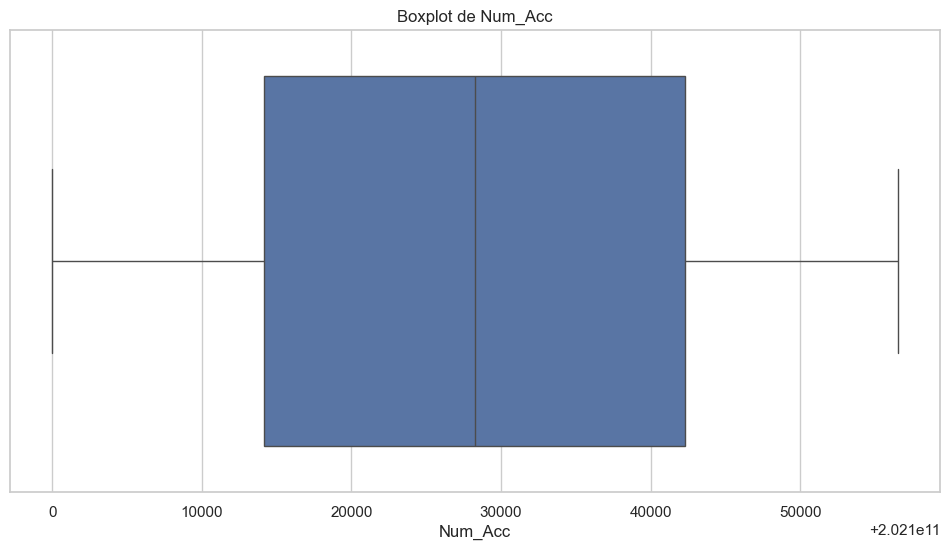

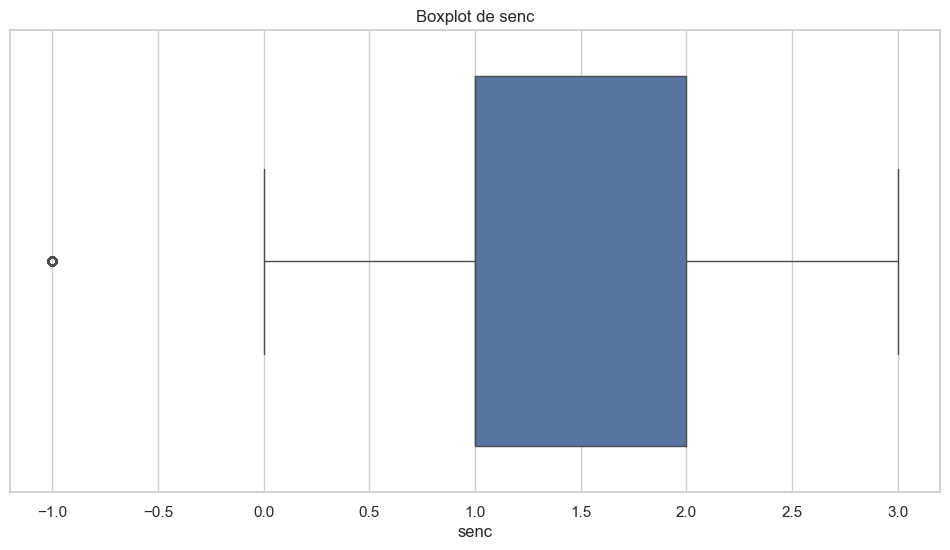

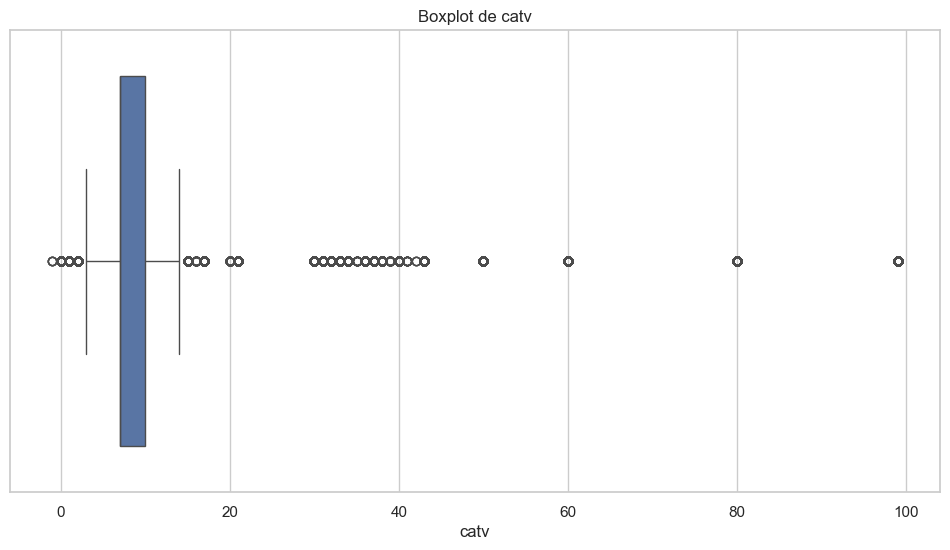

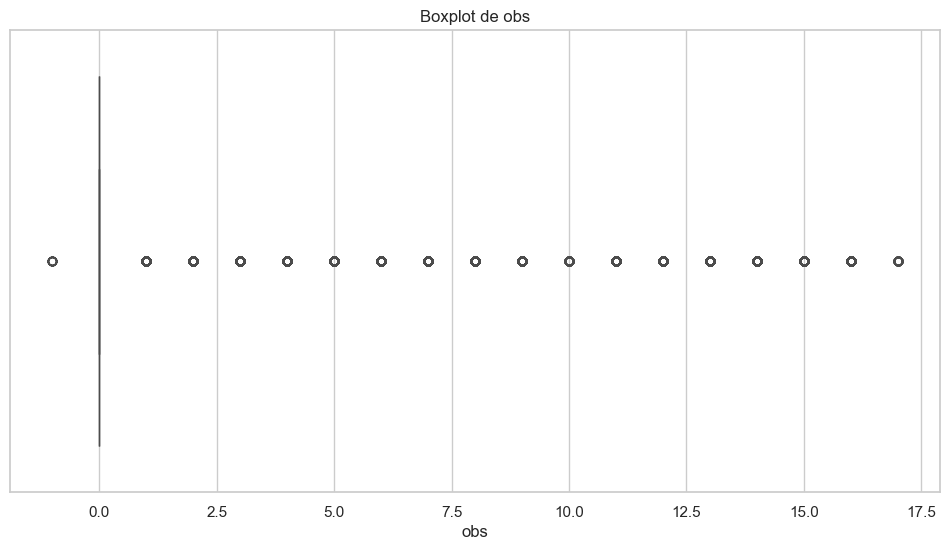

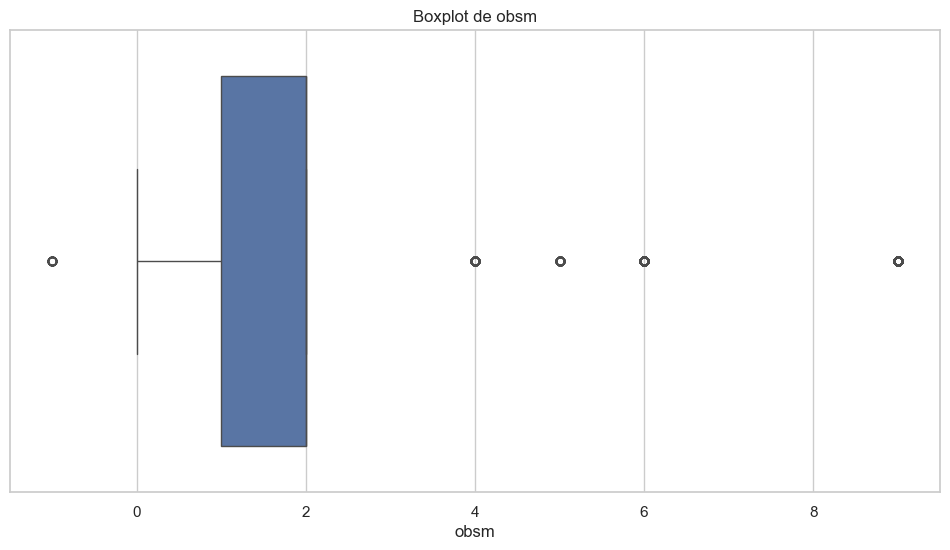

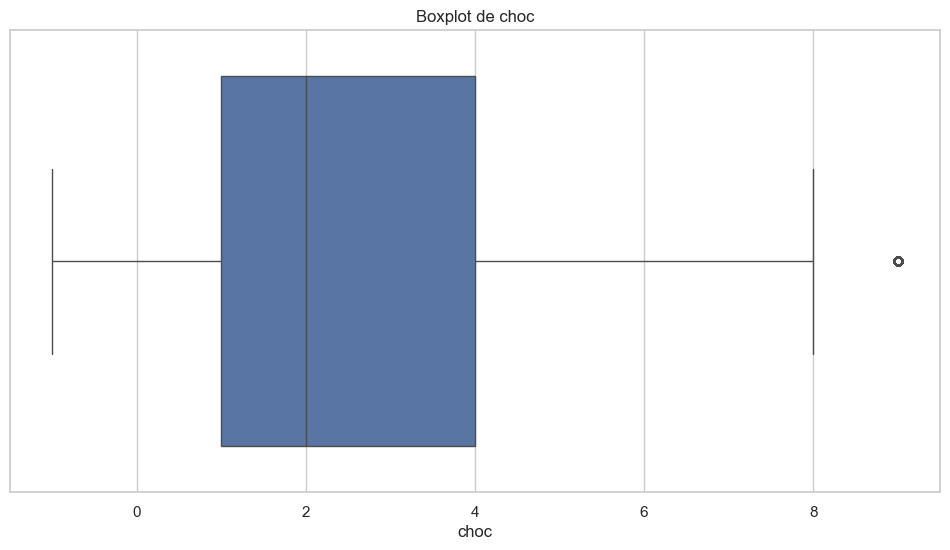

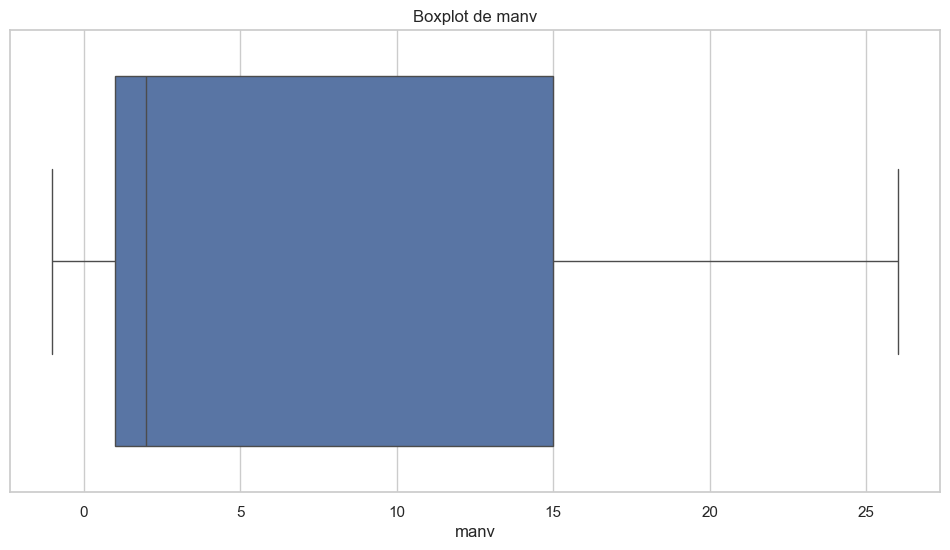

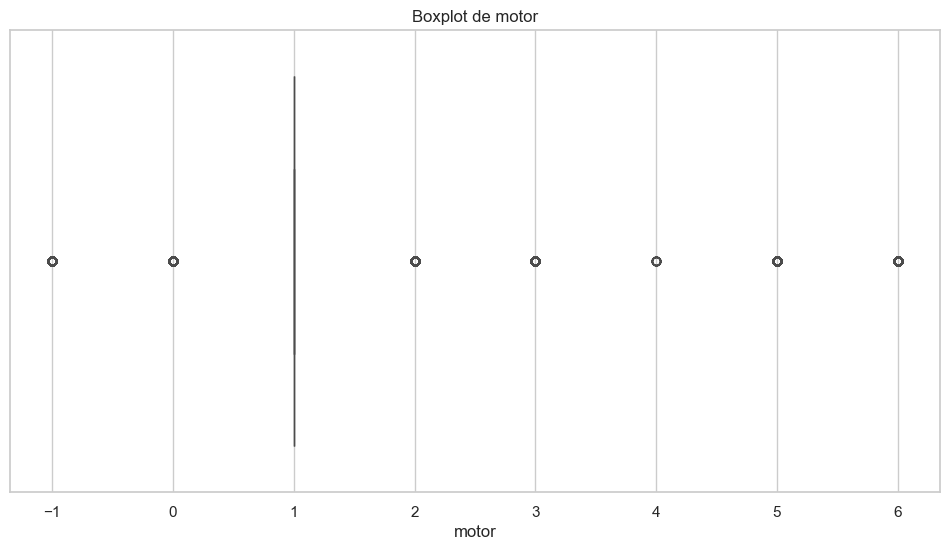

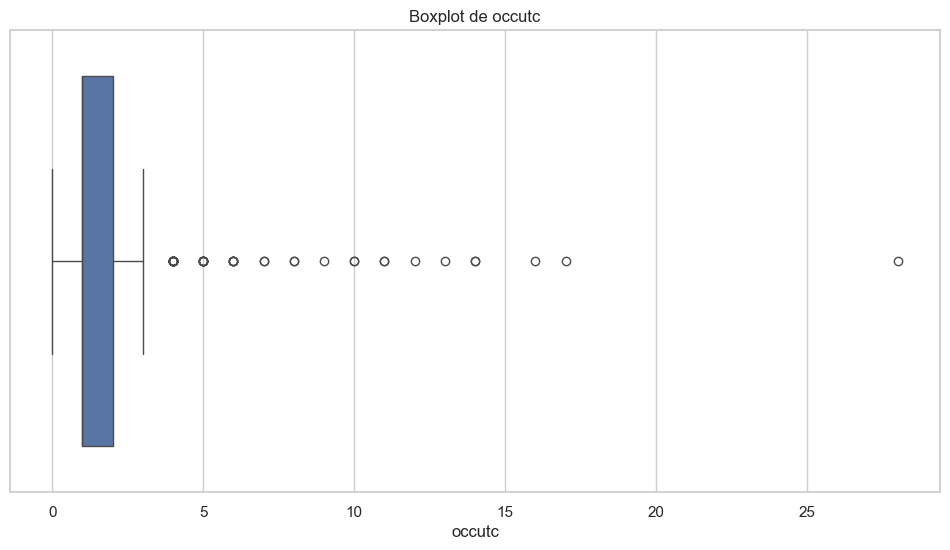

In [8]:
# plot des boxplots pour identifier les valeurs aberrantes dans les colonnes numériques
numeric_columns = vehicules_df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=vehicules_df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [9]:
# Calculer les scores Z pour les colonnes numériques pour identifier les valeurs aberrantes
z_scores = np.abs((vehicules_df[numeric_columns] - vehicules_df[numeric_columns].mean()) / vehicules_df[numeric_columns].std())
outliers = (z_scores > 3).sum()
outliers

Num_Acc       0
senc        407
catv       1209
obs        4269
obsm       1877
choc          0
manv          0
motor      5640
occutc       14
dtype: int64

## 7. Visualisation des données

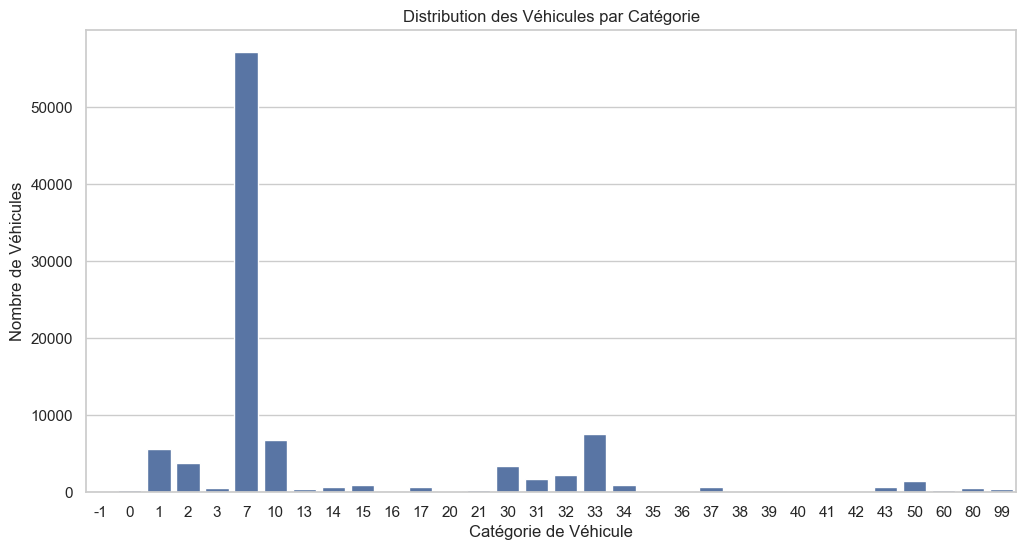

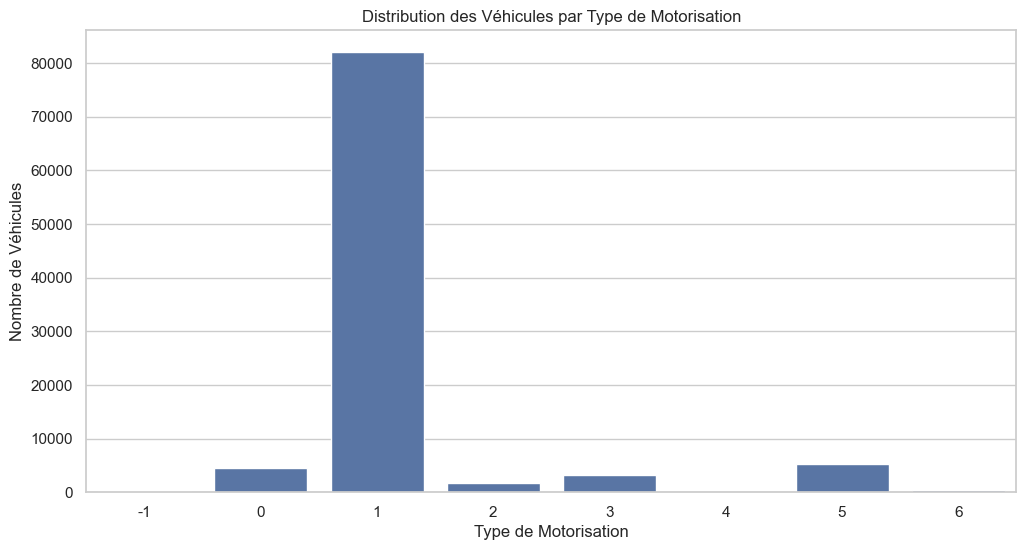

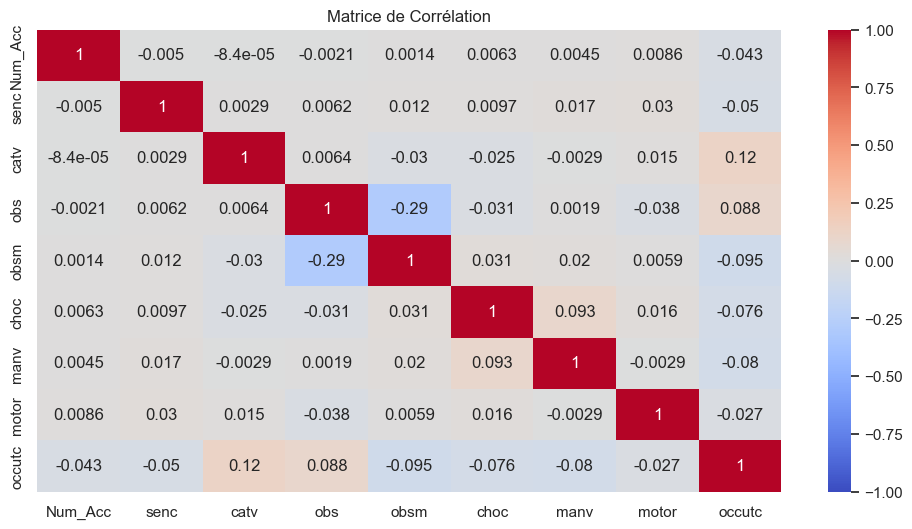

In [10]:
# Distribution des véhicules par catégorie
plt.figure()
sns.countplot(x='catv', data=vehicules_df)
plt.title('Distribution des Véhicules par Catégorie')
plt.xlabel('Catégorie de Véhicule')
plt.ylabel('Nombre de Véhicules')
plt.show()

# Distribution des véhicules par type de motorisation
plt.figure()
sns.countplot(x='motor', data=vehicules_df)
plt.title('Distribution des Véhicules par Type de Motorisation')
plt.xlabel('Type de Motorisation')
plt.ylabel('Nombre de Véhicules')
plt.show()

# Sélectionner uniquement les colonnes numériques
numeric_columns = vehicules_df.select_dtypes(include=[np.number]).columns
numeric_df = vehicules_df[numeric_columns]

# Heatmap des corrélations entre les colonnes numériques
plt.figure()
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()


Distribution des véhicules par catégorie:

CLa distribution montre que certaines catégories de véhicules sont beaucoup plus fréquentes dans les accidents. Par exemple, les voitures particulières (probablement codées avec des valeurs basses comme 01 pour "Bicyclette", 07 pour "Voiture", etc.) sont les plus représentées.

Distribution des véhicules par type de motorisation 

Les véhicules à hydrocarbures (codés 1) sont les plus fréquents dans les accidents, suivis des véhicules électriques et hybrides.

Matrice de corrélation des colonnes numériques
Des corrélations peuvent être observées entre le type de choc (choc) et la catégorie du véhicule (catv), indiquant que certains types de véhicules sont plus susceptibles de subir des types spécifiques de collisions.

La variable manv (manœuvre) montre des corrélations avec d'autres variables comme choc, suggérant que certains types de manœuvres sont plus susceptibles de conduire à des accidents avec des chocs spécifiques.
